In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hw6_tips.csv")
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
avg_day = df.groupby("day")[["total_bill", "tip"]].mean().reset_index()
avg_day

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [10]:
order = ["Thur", "Fri", "Sat", "Sun"]
avg_day["day"] = pd.Categorical(avg_day["day"], categories=order, ordered=True)
avg_day = avg_day.sort_values("day")

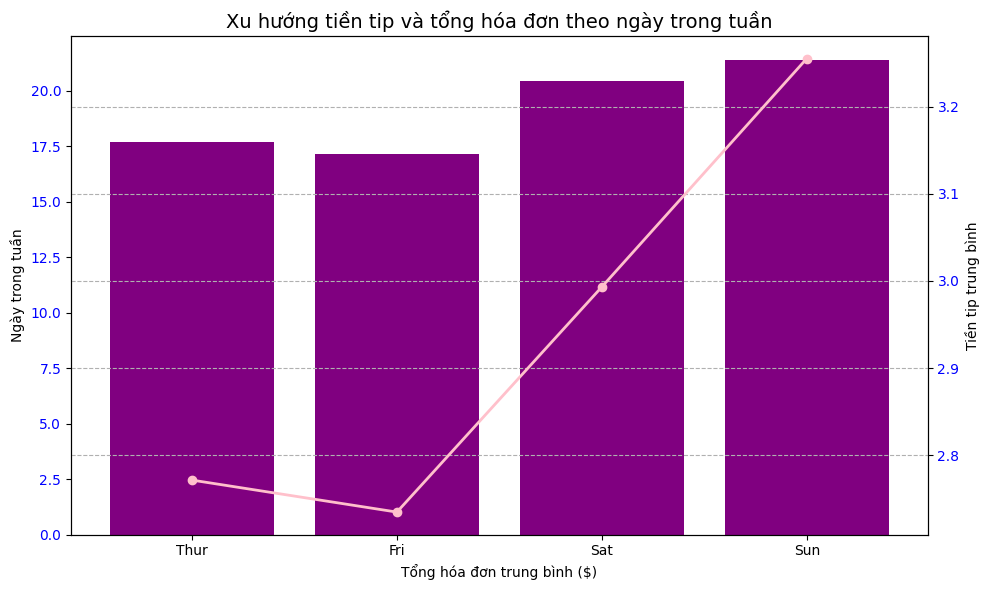

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(avg_day["day"], avg_day["total_bill"], label="Trung bình tổng hóa đơn", color="purple")

ax1.set_ylabel("Ngày trong tuần")
ax1.set_xlabel("Tổng hóa đơn trung bình ($)")
ax1.tick_params(axis="y", labelcolor = "blue")

ax2 = ax1.twinx()
ax2.plot(avg_day["day"], avg_day["tip"], color="pink", marker="o", linewidth=2, label="Trung bình tiền tip")
ax2.set_ylabel("Tiền tip trung bình")
ax2.tick_params(axis="y", labelcolor = "blue")

plt.title("Xu hướng tiền tip và tổng hóa đơn theo ngày trong tuần", fontsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.grid(axis="y", linestyle="--", )
plt.tight_layout()

plt.show()

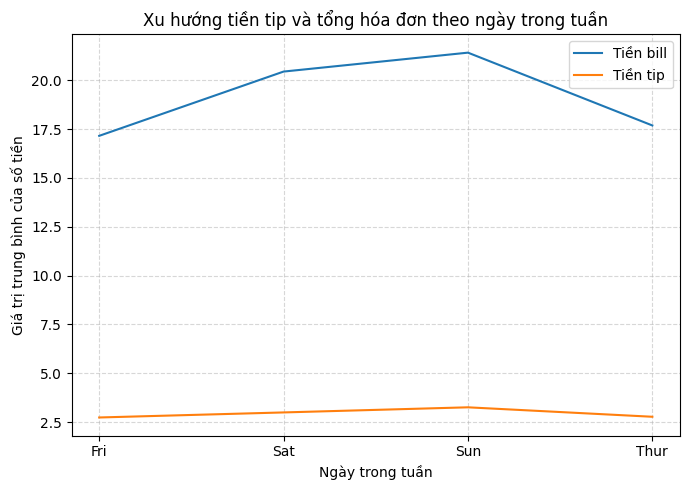

In [4]:
plt.figure(figsize=(7, 5))
plt.plot(avg_day["total_bill"], label="Tiền bill")
plt.plot(avg_day["tip"], label="Tiền tip")

plt.title("Xu hướng tiền tip và tổng hóa đơn theo ngày trong tuần")
plt.xlabel("Ngày trong tuần")
plt.ylabel("Giá trị trung bình của số tiền")
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()

plt.show()